# StableOps
## Overview

**StableOps** is an analysis of potential opportunities derived from volatility in stablecoin pricing.  It was observed that several stablecoins have some pricing volatility.  Although usually pegged to a FIAT currency, like the US dollar, they sometimes drift to be a little over or under that value.

![Paxos Price History](images/USDP_price.png)
![Paxos Price Histogram](images/paxos_price_hist.png)

In theory, if this volatility could be harnessed, it might be profitable.  The objective of this project is to analyze volatility in stablecoin pricing and assess whether this volatility could provide profitable arbitrage opportunities. 

In order to explore this hypothesis further, the following will be analyzed:
* A statistical analysis of the price volatility of several stable coins using daily data going back several years.  The following stablecoins will be reviewed:
    * USDC
    * USDT
    * PAXOS
    * DAI
    * sUSD
    * GUSD

* A statistical analysis of the price volatility of selected stable coins using high resolution price data data going back several years, at up to 1 minute intervals (see [intraday.ipynb](intraday.ipynb)).  The following stablecoins will be reviewed:
    * DAI
    * PAXOS
    * UST

* Rolling 30 day analysis of the volatility of stablecoin price volatility.
* Modelling potential arbitrage return using daily price data over that last 365 days.
* Survey of safer stablecoin investment alternatives, such as yield farming ( see [stable_coin_compare.ipynb](stable_coin_compare.ipynb)).
* Modelling yield farming returns
* Risk/ Reward analysis using Sharpe Ratio comparing arbitrate with yield farming.

In [70]:
# import dependencies used in analysis

import requests
import json
import pandas as pd
import os
import numpy as np
import hvplot.pandas
from utils.utils import coin_gecko_cleaner
%matplotlib inline

In [71]:
# constants used in the analysis
peg=1.00 # the value a stable coin is expected to be valued at, $1.00 USD
margin=0.01  # the margin needed for profitable arbitrage
trading_days_per_year = 365


## Daily Stablecoin Price Data

### USDC : USD Coin

In [72]:
# Pulling in api data for USDC
usdc_url = 'https://api.coingecko.com/api/v3/coins/usd-coin/market_chart?vs_currency=usd&days=1095&interval=daily'

In [73]:
# Converting api to json format
usdc = requests.get(usdc_url).json()

In [74]:
# Converting json into DataFrame
usdc_df=pd.DataFrame(usdc)

In [75]:
# inspect original dataframe
usdc_df.head()

,prices,market_caps,total_volumes
0,"[1558569600000, 0.9998024114923273]","[1558569600000, 360266085.5269885]","[1558569600000, 367755623.2256438]"
1,"[1558656000000, 1.0020401855802195]","[1558656000000, 361312034.41507894]","[1558656000000, 151408068.26361677]"
2,"[1558742400000, 1.000936191533932]","[1558742400000, 360687372.60481495]","[1558742400000, 177835906.27547008]"
3,"[1558828800000, 1.0037128509121127]","[1558828800000, 363359359.00397295]","[1558828800000, 120036519.6281535]"
4,"[1558915200000, 0.9999653657173496]","[1558915200000, 362378697.0302579]","[1558915200000, 166189313.60345092]"


The data is returned in tuples consisting of Unix epoch time followed by the value.  
The dataframe index should be a date set according to the extracted epoch time.  Converting the Unix epoch time to DateTime will facilitate an easier understanding of the data as well as enable additional DataFrame time based capabilities.  The reusable *coin_gecko_cleaner()* function was created to prepare the dataframe, including extracting and setting the DateTime index.

In [76]:
# cleaning url. Displaying dataframe
usdc = coin_gecko_cleaner(usdc_url)

# inspect dataframe
usdc.head()

,prices,market_caps,total_volumes
time,,,
2019-05-22,0.999802,3.602661e+08,3.677556e+08
2019-05-23,1.002040,3.613120e+08,1.514081e+08
2019-05-24,1.000936,3.606874e+08,1.778359e+08
2019-05-25,1.003713,3.633594e+08,1.200365e+08
2019-05-26,0.999965,3.623787e+08,1.661893e+08


In [77]:
# Plotting Daily Prices
usdc_price_plot = usdc.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='USDC Daily Prices May 2020 - May 2022'
)
#saving plot to .png
# hvplot.save(usdc_price_plot, 'images/usdc_price.png')

#display plot
usdc_price_plot

:Curve   [time]   (prices)

In [78]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
usdc_arb = usdc['prices'][usdc['prices'] <= (peg-margin)].count() + usdc['prices'][usdc['prices'] >= (peg+margin)].count()
print(f"USDC had {usdc_arb} arbitrage opportunities")

USDC had 7 arbitrage opportunities


In [79]:
# Creating variables for standard deviation and mean 
usdc_mean = usdc.describe().loc['mean','prices']
usdc_std = usdc.describe().loc['std','prices']

### GUSD : Gemini Dollar

In [80]:
# Pulling in api data for GUSD
gusd_url = 'https://api.coingecko.com/api/v3/coins/gemini-dollar/market_chart?vs_currency=usd&days=1095&interval=daily'

# cleaning url. Displaying dataframe
gusd = coin_gecko_cleaner(gusd_url)

# inspect dataframe
gusd.head()

,prices,market_caps,total_volumes
time,,,
2019-05-22,0.996765,2.242025e+07,2.795331e+07
2019-05-23,0.999212,2.218988e+07,2.825804e+07
2019-05-24,1.000104,2.223352e+07,2.885259e+07
2019-05-25,1.000882,2.215154e+07,2.823884e+07
2019-05-26,1.009095,2.228724e+07,4.029591e+07


In [81]:
# Plotting Daily Prices
gusd_price_plot = gusd.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='Gemini Dollar Daily Prices May 2020 - May 2022'
)
# save as .png
# hvplot.save(gusd_price_plot, 'images/gusd_price.png')

#display plot
gusd_price_plot

:Curve   [time]   (prices)

In [82]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
gusd_arb = gusd['prices'][gusd['prices'] <= (peg-margin)].count() + gusd['prices'][gusd['prices'] >= (peg+margin)].count()
print(f"GUSD had {gusd_arb} arbitrage opportunities")

GUSD had 149 arbitrage opportunities


In [83]:
# Creating variables for standard deviation and mean 
gusd_mean = gusd.describe().loc['mean','prices']
gusd_std = gusd.describe().loc['std','prices']

### USDT : US Dollar Tether

In [84]:
# Pulling in api data for USDT
usdt_url = 'https://api.coingecko.com/api/v3/coins/tether/market_chart?vs_currency=usd&days=1095&interval=daily'

# cleaning url. displaying DataFrame
usdt = coin_gecko_cleaner(usdt_url)

# inspect dataframe
usdt.head()

,prices,market_caps,total_volumes
time,,,
2019-05-22,1.000570,2.056883e+09,2.651286e+10
2019-05-23,1.001483,2.061262e+09,2.797105e+10
2019-05-24,1.001855,2.063260e+09,2.932611e+10
2019-05-25,1.001235,2.060613e+09,2.551885e+10
2019-05-26,1.007065,2.068333e+09,2.897424e+10


In [85]:
# Plotting Daily Prices
usdt_price_plot = usdt.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='USDT Daily Prices May 2020 - May 2022'
)
# saving plot as .png
# hvplot.save(usdt_price_plot, 'images/usdt_price.png')

#display plot
usdt_price_plot

:Curve   [time]   (prices)

In [86]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
usdt_arb = usdt['prices'][usdt['prices'] <= (peg-margin)].count() + usdt['prices'][usdt['prices'] >= (peg+margin)].count()
print(f"USDT had {usdt_arb} arbitrage opportunities")

USDT had 6 arbitrage opportunities


In [87]:
# Creating variables for standard deviation and mean 
usdt_mean = usdt.describe().loc['mean','prices']
usdt_std = usdt.describe().loc['std','prices']

### USDP : Paxos-Standard

In [88]:
# Pulling in api data for USDP
usdp_url = 'https://api.coingecko.com/api/v3/coins/paxos-standard/market_chart?vs_currency=usd&days=1095&interval=daily'

# cleaning url. Displaying DataFrame
usdp = coin_gecko_cleaner(usdp_url)

# inspect dataframe
usdp.head()

,prices,market_caps,total_volumes
time,,,
2019-05-22,0.997595,1.777255e+08,5.043136e+08
2019-05-23,0.997621,1.775881e+08,5.593109e+08
2019-05-24,0.995586,1.767331e+08,5.430040e+08
2019-05-25,0.995438,1.759668e+08,4.033268e+08
2019-05-26,0.995349,1.758233e+08,5.640232e+08


In [89]:
# Plotting Daily Prices
usdp_price_plot = usdp.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='Paxos-Standard Daily Prices May 2020 - May 2022'
)

# save plot to .png
# hvplot.save(usdp_price_plot, 'images/usdp_price.png')

# display plot
usdp_price_plot

:Curve   [time]   (prices)

In [90]:
#Create a histogram of Paxos prices to visualize frequency of non peg prices
usdp_price_hist_plot = usdp.hvplot.hist(
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='Histogram of Paxos-Standard Daily Prices May 2020 - May 2022'
)
usdp_price_hist_plot

:Histogram   [prices]   (prices_count)

#### Paxos Price Historgram Analysis

The *Histogram of Paxos-Standard Daily Prices May 2020 - May* 2022 plot reveals that Paxos was off of it's peg valueof \#1.00 nearly 45% of the time. It also shows that a few larger outliers were observed that were +/ 0.3 from the peg value.

In [91]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
usdp_arb = usdp['prices'][usdp['prices'] <= (peg-margin)].count() + usdp['prices'][usdp['prices'] >= (peg+margin)].count()
print(f"USDP had {usdp_arb} arbitrage opportunities")

USDP had 19 arbitrage opportunities


In [92]:
# Creating variables for standard deviation and mean 
usdp_mean = usdp.describe().loc['mean','prices']
usdp_std = usdp.describe().loc['std','prices']

### DAI : Dai

In [93]:
# Pulling in api data for DAI
dai_url = 'https://api.coingecko.com/api/v3/coins/dai/market_chart?vs_currency=usd&days=1095&interval=daily'

# cleaning url. Displaying DataFrame
dai = coin_gecko_cleaner(dai_url)

# inspect dataframe
dai.head()

,prices,market_caps,total_volumes
time,,,
2019-11-18,1.000651,1.437646e+06,8.727642e+05
2019-11-19,0.995411,6.945898e+06,4.841469e+06
2019-11-20,0.991591,8.989928e+06,1.007820e+06
2019-11-21,0.991102,1.249487e+07,3.679540e+06
2019-11-22,0.992850,1.439175e+07,7.201905e+06


In [94]:
# Plotting Daily Prices
dai_price_plot = dai.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='DAI Daily Prices May 2020 - May 2022'
)

# save as .png
# hvplot.save(dai_price_plot, 'images/dai_price.png')

#display plot
dai_price_plot

:Curve   [time]   (prices)

In [95]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
dai_arb = dai['prices'][dai['prices'] <= (peg-margin)].count() + dai['prices'][dai['prices'] >= (peg+margin)].count()
print(f"DAI had {dai_arb} arbitrage opportunities")

DAI had 173 arbitrage opportunities


In [96]:
# Creating variables for standard deviation and mean 
dai_mean = dai.describe().loc['mean','prices']
dai_std = dai.describe().loc['std','prices']

### sUSD : Synthetix USD

In [97]:
# Pulling in api data for sUSD
susd_url = 'https://api.coingecko.com/api/v3/coins/nusd/market_chart?vs_currency=usd&days=1095&interval=daily'

# cleaning url. Displaying DataFrame
susd = coin_gecko_cleaner(susd_url)

# inspect dataframe
susd.head()

,prices,market_caps,total_volumes
time,,,
2019-05-22,0.992130,1.318240e+06,62110.323411
2019-05-23,0.974488,1.365479e+06,20560.452745
2019-05-24,0.976774,1.373353e+06,42091.205095
2019-05-25,0.974618,1.430889e+06,23278.405628
2019-05-26,0.975818,1.684320e+06,23308.175649


In [98]:
# Plotting Daily Prices
susd_price_plot = susd.hvplot.line(
    x='time',
    y='prices',
    xlabel='Date',
    ylabel='Price',
    title='Synthetic USD Daily Prices May 2020 - May 2022'
)

# save as .png
# hvplot.save(susd_price_plot, 'images/susd_price.png')

# display plot
susd_price_plot

:Curve   [time]   (prices)

In [99]:
# Counting frequency of prices where the price was above or below its peg 
# by an amount equal to or greather than the margin
susd_arb = susd['prices'][susd['prices'] <= (peg-margin)].count() + susd['prices'][susd['prices'] >= (peg+margin)].count()
print(f"sUSD had {susd_arb} arbitrage opportunities")

sUSD had 484 arbitrage opportunities


In [100]:
# Creating variables for standard deviation and mean 
susd_mean = susd.describe().loc['mean','prices']
susd_std = susd.describe().loc['std','prices']

### Stable Coin Summary Table

In [101]:
# Create Stable Coin Summary Table
stable_coin_portfolio = pd.DataFrame()

In [102]:
#Dictionary to add to Stable Coin Summary containing the mean, standard deviation, return, and sharpe ratio of each stable coin
stable_coin_symbols = ['USDC', 'GUSD', 'USDT', 'USDP', 'DAI', 'sUSD']
stable_coin_arb = [usdc_arb, gusd_arb, usdt_arb, usdp_arb, dai_arb, susd_arb]
stable_coin_mean = [usdc_mean, gusd_mean, usdt_mean, usdp_mean, dai_mean, susd_mean]
stable_coin_std = [usdc_std, gusd_std, usdt_std, usdp_std, dai_std, susd_std]

#Adding to Dataframe
stable_coin_portfolio['Coin Symbol']=stable_coin_symbols
stable_coin_portfolio['Potential Arbitrage Opportunities']=stable_coin_arb
stable_coin_portfolio['Std $\sigma$']=stable_coin_std
stable_coin_portfolio['Mean']=stable_coin_mean

# Set index to become the Coin Symbol Column
stable_coin_portfolio.set_index('Coin Symbol', inplace=True)

#Format Dataframe
stable_coin_portfolio.style.format(formatter={'Mean': "{:.4f}",
                                                      'Std $\sigma$': "{:.4f}"
                                                     })

,Potential Arbitrage Opportunities,Std $\sigma$,Mean
Coin Symbol,,,
USDC,7,0.0026,1.0005
GUSD,149,0.0090,0.9991
USDT,6,0.0023,1.0007
USDP,19,0.0034,1.0006
DAI,173,0.0095,1.0033
sUSD,484,0.0309,0.9949


## Summary Table Analysis
- Based on the number of potential arbitrage opportunities and volatility (std), USDC, GUSD, USDT and USDP would not be good candidates to develop a trading strategy for. 
    - Although GUSD has 150 potential arbitrage opportunities, it's low standard deviation and .99 cent mean price don't provide enough volatility or potential arbitrage spread.
    - sUSD and DAI have higher volatility and would be better candidates to further investingate and potentially develop a trading strategy to capitalize on potential arbitrage opportunities.
- As expected the average price for each stable coin is pretty close to 1, with the exception of sUSD
    - sUSD stands out in this group of coins with the lowest average price, highest standard deviation, and the most potential arbitrage opportunities, over 480, from May 2019 - May 2022. 

In [103]:
# Plotting stable_coin_portfolio DataFrame
stable_coin_plot = stable_coin_portfolio['Potential Arbitrage Opportunities'].hvplot.bar(
    xlabel='Stable Coin Symbols',
    ylabel='Potential Arbitrage Opportunities',
    title = 'Arbitrage Opportunities of Stable Coins May 2019 - May 2022'
)
# # Saving plot to .png file
# hvplot.save(stable_coin_plot, 'images/arbitrage_opp_plot.png')

# display the graph
stable_coin_plot

:Bars   [Coin Symbol]   (Potential Arbitrage Opportunities)

<AxesSubplot:title={'center':'Stable Coin Prices 2019-2022'}, xlabel='time'>

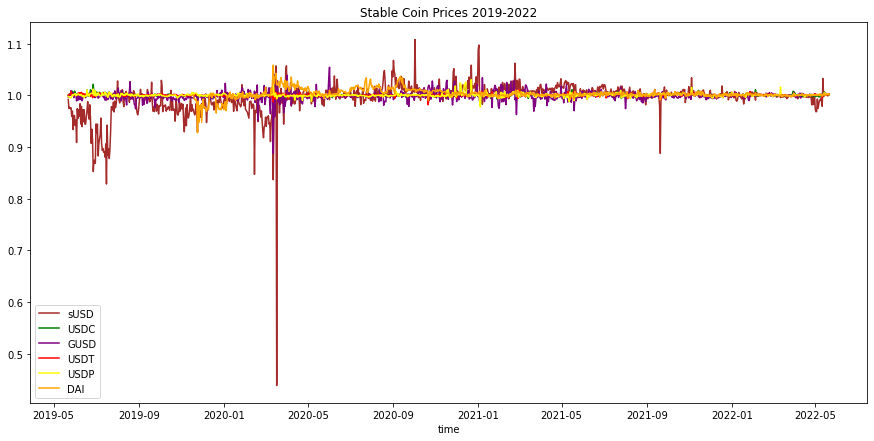

In [104]:
# Overlapping line plot to display price volatility 

combined_plot = susd['prices'].plot(
    legend=True,
    figsize=(15,7),
    color = 'brown',
    label = 'sUSD'
)
usdc['prices'].plot(
    legend=True,
    figsize=(15,7),
    title = 'Stable Coin Prices 2019-2022',
    color = 'green',
    label = 'USDC'
)
gusd['prices'].plot(
    legend=True,
    figsize=(15,7),
    color = 'purple',
    label = 'GUSD'
)
usdt['prices'].plot(
    legend=True,
    figsize=(15,7),
    color = 'red',
    label = 'USDT'
)
usdp['prices'].plot(
    legend=True,
    figsize=(15,7),
    color = 'yellow',
    label = 'USDP'
)
dai['prices'].plot(
    legend=True,
    figsize=(15,7),
    color = 'orange',
    label = 'DAI'
)


In [105]:
#save plot to file
combined_plot.figure.savefig('images/overlapping_coin_prices.png')

In [106]:
# Plotting stable_coin_portfolio standard deviations
stable_coin_std_plot = stable_coin_portfolio['Std $\sigma$'].hvplot.bar(
    xlabel='Stable Coin Symbols',
    ylabel='Standard Devaition',
    title = 'Standard Deviations of Stable Coins May 2019 - May 2022'
)
stable_coin_std_plot

:Bars   [Coin Symbol]   (Std $\sigma$)

## Price Plot Analysis
 - sUSD was consistently the most volatile coin.
 - Overall, stable coins showed higher volatility between 2019-2021. Volatility decreases in 2022 showing a small increase of activity again in May 2022.

## Rolling 3 Day Volatility Analisys

In [107]:
# Create a comparative Rolling 3 day mean price plot 
stable_coin_prices_df = pd.concat(
    [
        usdc['prices'], 
        gusd['prices'], 
        usdt['prices'], 
        usdp['prices'], 
        dai['prices'], 
        susd['prices']
    ],
    ignore_index=True,
    axis=1,
)

stable_coin_prices_df.columns=['USDC', 'GUSD', 'USDT', 'USDP', 'DAI', 'sUSD']

# # Review
stable_coin_prices_df

,USDC,GUSD,USDT,USDP,DAI,sUSD
time,,,,,,
2019-05-22,0.999802,0.996765,1.000570,0.997595,NaN,0.992130
2019-05-23,1.002040,0.999212,1.001483,0.997621,NaN,0.974488
2019-05-24,1.000936,1.000104,1.001855,0.995586,NaN,0.976774
2019-05-25,1.003713,1.000882,1.001235,0.995438,NaN,0.974618
2019-05-26,0.999965,1.009095,1.007065,0.995349,NaN,0.975818
...,...,...,...,...,...,...
2022-05-17,1.002662,1.002885,1.000586,1.001213,1.001898,1.002738
2022-05-18,1.002225,1.001748,1.000228,1.001697,1.001998,1.000063
2022-05-19,1.001676,1.003524,1.001082,1.003353,1.002607,0.998989


<AxesSubplot:title={'center':'Rolling 3 Day Mean Prices - 2019-2022'}, xlabel='time'>

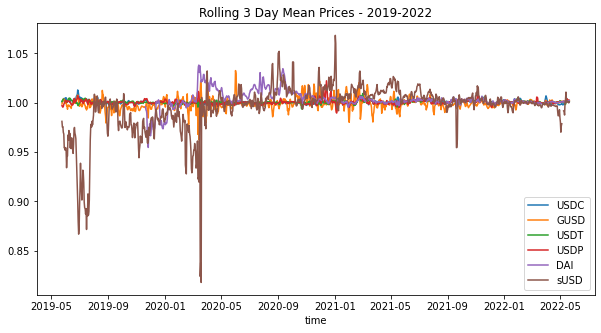

In [108]:
stable_coin_3_Day_rolling = stable_coin_prices_df.rolling(3).mean()
stable_coin_3_Day_rolling.plot(
    figsize=(10,5),
    title='Rolling 3 Day Mean Prices - 2019-2022'
)

<AxesSubplot:title={'center':'Rolling 3 Day Variance- 2019-2022'}, xlabel='time'>

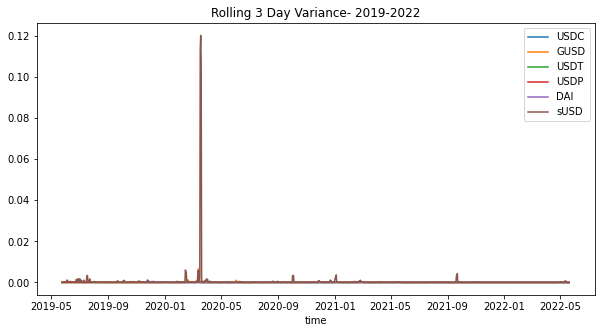

In [109]:
stable_coin_3_Day_rolling = stable_coin_prices_df.rolling(3).var()
stable_coin_3_Day_rolling.plot(
    figsize=(10,5),
    title='Rolling 3 Day Variance- 2019-2022'
)

### Rolling 3 Day Analysis
* As mentioned above, trends changed over time with more volatility on most coins prior to 2021
* Significant peaks, as seen for sUSD, DAI and GUSD lasted several days.

## Modeling Stable Coin Arbitrage: May 2021 - May 2022

### Create stable coin price dataset

<AxesSubplot:title={'center':'Stable Coin Prices May 2021 - May 2022'}, xlabel='Date'>

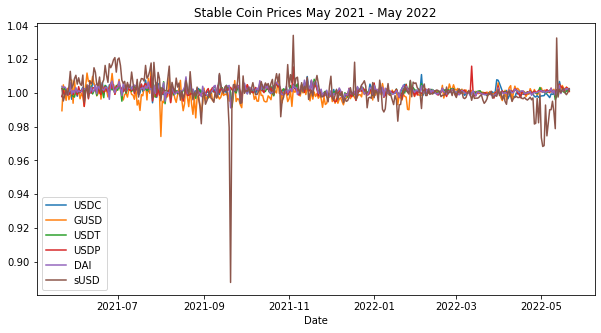

In [110]:
# for each coin, retrieve prices in the last year
usdc_last_year=usdc[-365:]['prices']
gusd_last_year=gusd[-365:]['prices']
usdt_last_year=usdt[-365:]['prices']
usdp_last_year=usdp[-365:]['prices']
dai_last_year=dai[-365:]['prices']
susd_last_year=susd[-365:]['prices']
coins_last_year_df = pd.concat([usdc_last_year, gusd_last_year, usdt_last_year, usdp_last_year, dai_last_year, susd_last_year],axis=1)
coins_last_year_df.columns=['USDC', 'GUSD', 'USDT', 'USDP', 'DAI', 'sUSD']
coins_last_year_df.dropna(inplace=True)

# visualize last years' prices
coins_last_year_df.plot(
    figsize=(10,5),
    xlabel='Date',
    title='Stable Coin Prices May 2021 - May 2022'
)

## Modeling Abritrage Returns: 2021-2022

### TODO Documentation 
- How we are modeling arbitrage and return: 
- Specify our assumption of clearing minimum 1% 

In [111]:
coins_last_year_df['USDC_arb'] = 0
coins_last_year_df['USDC_arb'] = (coins_last_year_df.loc[(coins_last_year_df['USDC'] <= (peg-margin)) | (coins_last_year_df['USDC'] >=(peg+margin)),'USDC'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['USDC_arb'].fillna(0,inplace=True)

coins_last_year_df['GUSD_arb'] = 0
coins_last_year_df['GUSD_arb'] =(coins_last_year_df.loc[(coins_last_year_df['GUSD'] <= (peg-margin)) | (coins_last_year_df['GUSD'] >=(peg+margin)),'GUSD'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['GUSD_arb'].fillna(0,inplace=True)

coins_last_year_df['USDT_arb'] = 0
coins_last_year_df['USDT_arb'] =(coins_last_year_df.loc[(coins_last_year_df['USDT'] <= (peg-margin)) | (coins_last_year_df['USDT'] >=(peg+margin)),'USDT'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['USDT_arb'].fillna(0,inplace=True)

coins_last_year_df['USDP_arb'] = 0
coins_last_year_df['USDP_arb'] =(coins_last_year_df.loc[(coins_last_year_df['USDP'] <= (peg-margin)) | (coins_last_year_df['USDP'] >=(peg+margin)),'USDP'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['USDP_arb'].fillna(0,inplace=True)

coins_last_year_df['DAI_arb'] = 0
coins_last_year_df['DAI_arb'] =(coins_last_year_df.loc[(coins_last_year_df['DAI'] <= (peg-margin)) | (coins_last_year_df['DAI'] >=(peg+margin)),'DAI'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['DAI_arb'].fillna(0,inplace=True)

coins_last_year_df['sUSD_arb'] = 0
coins_last_year_df['sUSD_arb'] =(coins_last_year_df.loc[(coins_last_year_df['sUSD'] <= (peg-margin)) | (coins_last_year_df['sUSD'] >=(peg+margin)),'sUSD'].apply(lambda x: (x-peg)/peg if x > peg else (peg-x)/x))-margin
coins_last_year_df['sUSD_arb'].fillna(0,inplace=True)
display(coins_last_year_df)

,USDC,GUSD,USDT,USDP,DAI,sUSD,USDC_arb,GUSD_arb,USDT_arb,USDP_arb,DAI_arb,sUSD_arb
time,,,,,,,,,,,,
2021-05-22,0.998093,0.989484,1.002870,0.997821,1.003970,1.002639,0.0,0.000628,0.0,0.0,0.0,0.0
2021-05-23,0.999800,1.004832,1.001365,1.001561,1.003149,0.995259,0.0,0.000000,0.0,0.0,0.0,0.0
2021-05-24,1.000310,0.999834,1.003081,0.998991,1.003641,0.998623,0.0,0.000000,0.0,0.0,0.0,0.0
2021-05-25,0.999217,0.995625,1.001160,1.000028,1.002556,1.001800,0.0,0.000000,0.0,0.0,0.0,0.0
2021-05-26,0.999699,1.002734,0.999310,0.999120,0.998606,0.998855,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,1.002662,1.002885,1.000586,1.001213,1.001898,1.002738,0.0,0.000000,0.0,0.0,0.0,0.0
2022-05-18,1.002225,1.001748,1.000228,1.001697,1.001998,1.000063,0.0,0.000000,0.0,0.0,0.0,0.0
2022-05-19,1.001676,1.003524,1.001082,1.003353,1.002607,0.998989,0.0,0.000000,0.0,0.0,0.0,0.0


## Model Yield Farming Series

A survey of safer stablecoin investment alternatives, such as yield farming was performed, see [stable_coin_compare.ipynb](stable_coin_compare.ipynb).

Based on this survey, it was observed that yield farming was a good safe alternative.  The statistical distribution of yield farming returns were:
* mean return: 0.011282
* standard deviation: 0.001064

These statistics will be used to create a series that models daily returns from yield farming over the last 365 days.

In [112]:
#Values obtained from analysis performed in stable_coin_compare.ipynb

# yield_farming_return = []
yield_farming_mean_apr = 0.011282
yield_farming_std = 0.001064
# create a mock series for the staking option
yield_farming_daily_return = pd.Series(np.random.normal(
    loc=yield_farming_mean_apr/trading_days_per_year,
    scale=yield_farming_std/np.sqrt(trading_days_per_year),
    size=365
))

# inspect mock series for the staking option 
yield_farming_daily_return.head()

0    0.000050
1   -0.000054
2    0.000024
3    0.000002
4    0.000041
dtype: float64

In [113]:
# create yield farming datafframe with date for the last 365 days
yield_farming_returns_df = pd.concat([pd.Series(list(coins_last_year_df.index)), yield_farming_daily_return],axis=1).dropna()
yield_farming_returns_df.columns=['time', 'Yield Farming']
yield_farming_returns_df.set_index('time',inplace=True)

# inspect yield farming returns model
yield_farming_returns_df.head()

,Yield Farming
time,
2021-05-22,0.000050
2021-05-23,-0.000054
2021-05-24,0.000024
2021-05-25,0.000002
2021-05-26,0.000041


## Risk / Reward Sharpe Ration Analysis 

The Sharpe ratio is a metric that helps quantify both the risk and the potential reward of a particular investment.
```
Sharpe Ration = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviation
```

For our purposes, 
* the risk free option is simply holding the stable coin, which returns 0%
* the arbitrage strategy will be compared to yield farming

In [114]:
# create df with arb returns and yield farming returns
arbitrage_returns_last_year_df = pd.concat([coins_last_year_df['USDC_arb'],
                                            coins_last_year_df['GUSD_arb'],
                                            coins_last_year_df['USDT_arb'],
                                            coins_last_year_df['USDP_arb'],
                                            coins_last_year_df['DAI_arb'],
                                            coins_last_year_df['sUSD_arb'],
                                            yield_farming_returns_df
                                           ],
                                           axis=1
                                          )

# Visualize arbitrage returns
arbitrage_returns_last_year_df

,USDC_arb,GUSD_arb,USDT_arb,USDP_arb,DAI_arb,sUSD_arb,Yield Farming
time,,,,,,,
2021-05-22,0.0,0.000628,0.0,0.0,0.0,0.0,0.000050
2021-05-23,0.0,0.000000,0.0,0.0,0.0,0.0,-0.000054
2021-05-24,0.0,0.000000,0.0,0.0,0.0,0.0,0.000024
2021-05-25,0.0,0.000000,0.0,0.0,0.0,0.0,0.000002
2021-05-26,0.0,0.000000,0.0,0.0,0.0,0.0,0.000041
...,...,...,...,...,...,...,...
2022-05-17,0.0,0.000000,0.0,0.0,0.0,0.0,0.000034
2022-05-18,0.0,0.000000,0.0,0.0,0.0,0.0,-0.000102
2022-05-19,0.0,0.000000,0.0,0.0,0.0,0.0,0.000011


In [115]:
# calculate the average annualized returns
annualized_returns = arbitrage_returns_last_year_df.mean() * trading_days_per_year

# display the average annualized returns
annualized_returns

USDC_arb         0.000927
GUSD_arb         0.036982
USDT_arb         0.000676
USDP_arb         0.011426
DAI_arb          0.000898
sUSD_arb         0.466826
Yield Farming    0.012275
dtype: float64

<AxesSubplot:title={'center':'Annualized Returns Stablecoin Arbitrage vs Yield Farming'}>

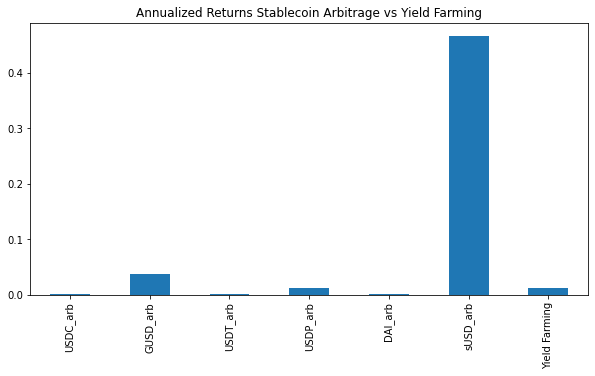

In [116]:
annualized_returns.plot.bar(
    rot=90,
    figsize=(10,5),
    title='Annualized Returns Stablecoin Arbitrage vs Yield Farming'
)

In [117]:
# calculate the annualized standard deviation
annual_standard_deviation = arbitrage_returns_last_year_df.std() * np.sqrt(trading_days_per_year)

# display the annualized standard deviation
annual_standard_deviation

USDC_arb         0.000926
GUSD_arb         0.018558
USDT_arb         0.000675
USDP_arb         0.008063
DAI_arb          0.000896
sUSD_arb         0.132127
Yield Farming    0.001141
dtype: float64

In [118]:
# calculate sharpe ratio
# Sharpe Ratio = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviatio
sharpe_ratio = (annualized_returns)/annual_standard_deviation

# display sharpe ratio
sharpe_ratio

USDC_arb          1.001373
GUSD_arb          1.992745
USDT_arb          1.001373
USDP_arb          1.416960
DAI_arb           1.001373
sUSD_arb          3.533161
Yield Farming    10.753571
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio Stablecoin Arbitrage vs Yield Farming'}>

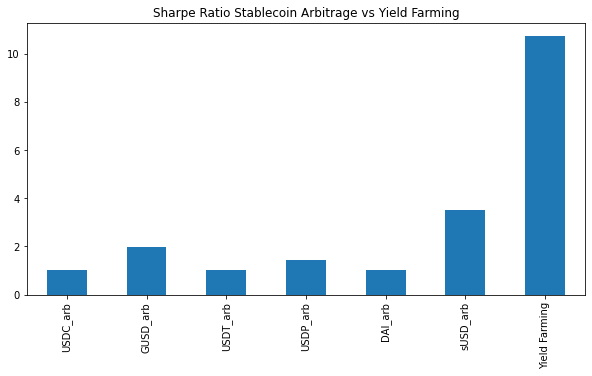

In [119]:
sharpe_ratio.plot.bar(
    rot=90,
    figsize=(10,5),
    title='Sharpe Ratio Stablecoin Arbitrage vs Yield Farming'
)

## Sharpe Ratio Analysis
- The Sharpe Ratio analysis shows that despite the potential high return of arbitrage on **sUSD**, surprisingly, nearly 50%, the high volatility of sUSD makes it a very risky investment.  Yield farming, with a modest return of around 1%, similar to that of a savings bank account, is seen as a better balance of risk vs reward.